# CSE 541 Homework 1
Evan Komp
***
***

## Probability

### 1.1
Prove Markov's inequality eg $P(X > \lambda)\le \mathbb{E}(X)/\lambda$

By definition of the expected value, for a positive random variable $X$:

$$\mathbb{E}(X) = \int_0^\inf xf(x)dx$$

Due to the law of total probability, $f(x)\ge 0$:

$$\ge \int_\lambda^\inf xf(x)dx$$

Given that $X$ is real, positive, and greater than lambda:

$$\ge \lambda\int_\lambda^\inf f(x)dx$$

By definition of the cummaltive distributio. function
> $$\ge \lambda P(X>\lambda)$$

### 1.2

We have a random vector $X\in \mathbb{R}^d$ with convex function $\phi: \mathbb{R}^d \rightarrow \mathbb{R}$. Show for discrete $X$ that $\phi(\mathbb{E}(X)) \le \mathbb{E}(\phi(X))$

We have the definition of convexity for $x_i\in X$: $\phi(tx_i+(1-t)x_j)\le t\phi(x_i)+(1-t)\phi(x_j)$

Our expected value $\mathbb{E}(X)=\Sigma_i^n x_i p(x_i)$

Due to the law of total probability:
$$\phi(\Sigma_{i=1}^nx_ip(x_i)) = \phi(x_1p(x_1)+(1-p(x_1))\frac{\Sigma_{i=2}^nx_ip(x_i)}{\Sigma_{i=2}^np(x_i)})$$

Given that the function is convex:

$$\le p(x_1)\phi(x_1)+(1-p(x_1))\phi(\frac{\Sigma_{i=2}^nx_ip(x_i)}{\Sigma_{i=2}^np(x_i)})$$

Given that the function maps a vector of length d to a scalar, we have the scalar denominator as independant:
$$\le x_1p(x_1)+\frac{1-p(x_1)}{\Sigma_{i=2}^np(x_i)}\Sigma_{i=2}^nx_ip(x_i) = x_1p(x_1)+\Sigma_{i=2}^nx_ip(x_i)$$

Repeating n times yields:

>$$\phi(\mathbb{E}(X))\le \phi(x_1)p(x_1)+,...,+x_np(x_n) = \mathbb{E}(\phi(X))$$

### 1.3

If $X_i$ are independant random sub gaussian variables with $\mathbb{E}[\exp(\lambda(X_i - \mathbb{E}(X_i)))]\le \exp(\lambda^2\sigma^2/2)$ for $\lambda \gt 0$, and $Z=\Sigma X_i$

By identity:
$$\mathbb{E}[\exp(\lambda(Z-a))] = \mathbb{E}[\Pi_i\exp(\lambda X_i)\exp(-\lambda a)]=\exp(\lambda(\Sigma_i\mathbb{E}(X_i)-a))\mathbb{E}[\Pi_i\exp(\lambda( X_i-\mathbb{E}(X_i)))]$$

By independant random variables:
$$=\exp(\lambda(\Sigma_i\mathbb{E}(X_i)-a))\Pi_i\mathbb{E}[\exp(\lambda( X_i-\mathbb{E}(X_i)))]$$

By each being sub gaussian:
$$\le \exp(\lambda(\Sigma_i\mathbb{E}(X_i)-a))\Pi_i \exp(\lambda^2\sigma_i^2/2)$$

So our target bound becomes: 
$$\exp(\lambda(\Sigma_i\mathbb{E}(X_i)-a))\Pi_i \exp(\lambda^2\sigma_i^2/2)\le \exp(\lambda^2b/2)$$

Taking the log and simplifying:
$$\lambda\frac{b-\Sigma\sigma_i^2}{2} - \Sigma\mathbb{E}(X_i)+a \le 0$$

This must be true for all $\lambda > 0$, thus taking $\lim_{\lambda\rightarrow 0}$ and to infinity yields. These are non interacting loose bounds:

$$a \le \Sigma\mathbb{E}(X_i)$$
$$b \ge \Sigma_i\sigma_i^2$$

### 1.4
If $X_i$ with $i=1,...,n$ be a sub gaussian random variable with $\mathbb{E}(\exp(\lambda X_i))\le \exp(\sigma_i^2\lambda^2/2)$ what is the upper bound on $\mathbb{E}(\max_iX_i)$

Starting from the identity given as a hint:
$$\mathbb{E}(\max_iX_i)=\frac{1}{\lambda}\ln(\exp(\lambda\mathbb{E}[\max_iX_i]))$$

And by Jensen's inequality on the exponentiation function:
$$\le \frac{1}{\lambda}\ln(\mathbb{E}[\exp(\lambda\max_iX_i)])$$

The max cannot be more than the sum:
$$\le \frac{1}{\lambda}\ln(\mathbb{E}[\exp(\lambda\Sigma_iX_i)]) = \frac{1}{\lambda}\ln(\mathbb{E}[\Pi_i\exp(\lambda X_i)])$$

Independance:
$$= \frac{1}{\lambda}\ln(\Pi_i\mathbb{E}[\exp(\lambda X_i)])$$

Sub Gaussian:
$$\le \frac{1}{\lambda}\ln(\Pi_i\exp(\sigma_i^2\lambda^2/2))$$

A product of n numbers is at most the product of the maximum number n times:
$$\le \frac{1}{\lambda}\ln(n\exp(\max_i\sigma_i^2\lambda^2/2))$$
$$=\frac{\ln(n)}{\lambda}+\max_i\sigma_i^2\lambda/2$$

Minimize w.r.t $\lambda$:
$$\lambda \ge \sqrt{\frac{\ln(n)2}{\max_i\sigma_i^2}}$$

Thus:
$$\mathbb{E}(max_iX_i) \le \sqrt{2\max_i\sigma_i^2\ln(n)}$$

***
## Upper Confidence Bound Algortithm

### 2.1

For UCB with event defined as
$$\mathcal{E}=\bigg\{\bigcap_{i\in[n]}\bigcap_{s\le T} |\hat{\mu}_{i,s} - \mu_i| \le \sqrt{\frac{2\ln{2nT^2}}{s}}\bigg\}$$

Show that $\mathbb{P}(\mathcal{E}) \ge 1 - T^{-1}$

We have
$$\mathbb{P}(\mathcal{E}) = 1-\mathbb{P}(\mathcal{E})^c= 1 - \bigcup_{i\in[n]}\bigcup_{s\le T} \mathbb{P}\bigg(\mathbb{1}\bigg\{|\hat{\mu}_{i,s} - \mu_i| \ge \sqrt{\frac{2\ln{2nT^2}}{s}}\bigg\}\bigg)$$

By the chernoff bound for 1-sub-gaussian variables:

$$\ge 1 - \bigcup_{i\in[n]}\bigcup_{s\le T}2\exp{\frac{-T_i(s)\sqrt{\frac{2\ln{2nT^2}}{s}}^2}{2}} = 1 - \bigcup_{i\in[n]}\bigcup_{s\le T}2\exp{\frac{-T_i(s)\ln{2nT^2}}{s}}$$

Union bound, and the most that $T_i(s)$ could be is $s+1-n \approx s$ for large s, yields:

$$\ge 1 - \Sigma_{i\in[n]}\Sigma_{s\le T}\frac{1}{nT^2}$$
> $$\ge 1-T^{-1}$$

### 2.2
Show the bound for $T_i$

We have the following condition for arm $i$ being pulled:

$$max_j\bigg(\hat{\mu}_{j,s-1} + \sqrt{\frac{2\ln{2nT^2}}{T_{j,s-1}}}\bigg) =\hat{\mu}_{i,s-1} + \sqrt{\frac{2\ln{2nT^2}}{T_{i,s-1}}}$$

The max of a sum cannot be more than the sum of the maxes:

$$max_j\bigg(\hat{\mu}_{j,s-1}\bigg) + max_j\bigg(\sqrt{\frac{2\ln{2nT^2}}{T_{j,s-1}}}\bigg) \le \hat{\mu}_{i,s-1} + \sqrt{\frac{2\ln{2nT^2}}{T_{i,s-1}}}$$

The largest empirical mean is the first one, adn the most that $T_{j,s-1}$ can be is $s-n\approx s$

$$\hat{\mu}_{1,s-1} + \sqrt{\frac{2\ln{2nT^2}}{s}} \le \hat{\mu}_{i,s-1} + \sqrt{\frac{2\ln{2nT^2}}{T_{i,s-1}}}$$

By our event:
$$\hat{\mu}_{i,s-1} - \mu_i \le \sqrt{\frac{2\ln{2nT^2}}{s-1}}$$

So with $s \approx s -1$ again:
$$-\sqrt{\frac{2\ln{2nT^2}}{s}} + \Delta_i <\sqrt{\frac{2\ln{2nT^2}}{T_{i,s-1}}}$$

At time $s=T$:

$$\Delta_i < (T^{-1}+T_{i,T-1}^{-1})\sqrt{2\ln{2nT^2}}$$

$T^{-1}\approx 0$:
$$T_{i,T-1} \le \frac{2\ln{2nT^2}}{\Delta_i^2}$$

We cannot pull more than once from arm $i$ in the last timestep:
>$$T_i \le 1+ \frac{2\ln{2nT^2}}{\Delta_i^2}$$

### 2.3

Trivially, if $T_i \le 1+ \frac{2\ln{2nT^2}}{\Delta_i^2}$, then $\mathbb{E}(T_i) \le 1+ \frac{2\ln{2nT^2}}{\Delta_i^2}$

We have regret:

$$R_T = \Sigma_i^n\Delta_i\mathbb{E}[T_i]$$

By total probability:

$$= \Sigma_i^n\bigg(\Delta_i\mathbb{E}[T_i\mathbb{1}\{\mathcal{E}\}] + \Delta_i\mathbb{E}[T_i\mathbb{1}\{\mathcal{E}^c\}]\bigg)$$

The probability that our event holds is $\le 1$ and that it doesn't is $\le \delta$. Also note that in the case the event happens, we know the upper bound on the expected value of $T_i$. In the case the event happens, the worst it could possibly be is $T-n+1 \approx T$:

$$\le \Sigma_i^n\bigg(\Delta_i(\frac{8 \ln(2nT^2)}{\Delta_i^2}+2) + \Delta_iT\delta\bigg)$$

Choose $\delta$ s.t.

$$\frac{8\ln{2nT^2}}{\Delta_i} + \Delta_iT\delta = \frac{24\ln(2T)}{\Delta_i}$$

Eg.
$$\delta = \frac{8\ln{4T/n}}{\Delta_i^2T}$$

Yielding
> $$R_T \le \Sigma_i^n \frac{24\ln(2T)}{\Delta_i} + 2\Delta_i$$

Given that $\Delta_1 = 0$

***
## Thompson Sampling

### 3.1

The probability of our compliment event:
$$\mathbb{P}(\mathcal{E}^c) = \bigcup_i^n\bigcup_t^T\mathbb{P}\bigg(\mathbb{1}\bigg\{|\hat{\theta_{i,t}} - \theta_i^*|\ge\sqrt{\frac{2\ln{2/\delta}}{t}}\bigg\}\bigg)$$

Given that $\hat{\theta_{i,t}} \in [-1,1]$ it is 1-sub-gaussian by Heoffding. This allows us to apply the Chernoff and union bound:
$$\le \Sigma_i^n\Sigma_t^T2\exp{\frac{-T_{i,t} (\frac{2\ln{2/\delta}}{t})}{2}}$$

$T_{i,t}$ is at most t:

>$$\le \Sigma_i^n\Sigma_t^T \delta = nT\delta$$

***
## Empirical testing

Agent code and plotting code is shown at the end.

### 4.1 
One arm does slightly better than all of the others

![4.1](p4.1.png)

I notice that Thompson significantly outperforms 

***
## Ap. Code

In [64]:
from typing import List
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import pandas as pd

In [156]:
class Agent:
    """Exploratory agent
    
    Properties:
     T - max time to run
     arms - vector of scipy distrobutions
     log_regret_every_n - None or int, when to save regret
    
    Attributes:
     T - int, max time
     t - time, starts at 0
     arms - vector of scipy distrobutions
     emp_means - vector of current empirical means for arms
     Tis - vector of pull counts for arms
     regret - float, current regret
     means - vector of true means
     true_best - index of true best arm
     delts - vector of mean differences from true best arm
    """
    def __init__(self, T: int, arms: List[object], log_regret_every_n: int = None):
        self.T = T
        self.arms = arms
        self.n = len(arms)
        self.emp_means = np.zeros((self.n,1))
        self.Tis = np.zeros((self.n,1), dtype=int)
        self.log_regret_every_n = log_regret_every_n
        self.regret = 0.0
        self.regret_log = []
        self._t = 0
        self.startup()
        return
    
    @property
    def t(self):
        return self._t
    
    def startup(self):
        raise NotImplemented()
    
    def pull(self, arm_num):
        # pull the arm and update the mean for that arm
        observation = self.arms[arm_num].rvs()
        self.update_emp_mean(arm_num, observation)
        # mark that we have pulled
        self.Tis[arm_num] += 1
        # update regret
        self.update_regret(arm_num)
        self._t += 1
        
        # check for logging regret
        if self.log_regret_every_n is not None:
            if self.t % self.log_regret_every_n == 0:
                self.regret_log.append((self.t, self.regret))
        return
    
    @property
    def means(self):
        return np.array([arm.mean() for arm in self.arms])
    
    @property
    def true_best(self):
        return np.argmax(self.means)
    
    @property
    def delts(self):
        best = max(self.means)
        return best - self.means
    
    def update_emp_mean(self, arm_num, observation):
        """Update empirical for an arm given a new observation
        
        Properties:
         arm_num - int index of arm to update
         obervation - float of observation from that arm
        """
        old_mean = self.emp_means[arm_num]
        new_mean = (old_mean * self.Tis[arm_num] + observation)/(self.Tis[arm_num] + 1)
        self.emp_means[arm_num] = new_mean
        return
    
    def update_regret(self, arm_num):
        """Update regret by specifying which arm was pulled.
        
        Properties:
         arm_num - int index of arm pulled
        """
        self.regret += self.delts[arm_num]
        return
    
    def step(self):
        raise NotImplemented()
    
    def run(self):
        """Run the algorithm until max time"""
        for t in range(self.T-self.t):
            self.step()
    

In [157]:
class UCB(Agent):
    """Selects arm with highest upper confidence bound at each step."""
    def __init__(self, T: int, arms: List[object], log_regret_every_n: int = None):
        super().__init__(T, arms, log_regret_every_n)
        return
    
    def startup(self):
        """Pull each arm once"""
        for i in range(self.n):
            self.pull(i)
        return
    
    @property
    def ucbs(self):
        """values of the ucbs, same length as arms"""
        cbs = np.sqrt(2*np.log(2*self.n*self.T**2)/self.Tis)
        ucbs = self.emp_means + cbs
        return ucbs
    
    def step(self):
        """determine the arm with largest ucb and pull it"""
        It = np.argmax(self.ucbs)
        self.pull(It)
        return

In [158]:
class ETC(Agent):
    """Pulls each arm m time and then chooses the best arm forever after"""
    def __init__(self, T: int, arms: List[object], m: int,  log_regret_every_n: int = None):
        super().__init__(T, arms,  log_regret_every_n)
        self.m = m
        return
    
    def startup(self):
        # no additional initialization needed
        return
    
    def step(self):
        # this class indexex time starting at 0 instead of 1
        t_ = self.t+1
        if t_ <= self.m*self.n:
            It = (t_ % self.n)
        else:
            It = np.argmax(self.emp_means)
        self.pull(It)
        return
        
        

In [175]:
class GaussianThompson(Agent):
    """Assumes posterior distributions for arms are independant.
    
    Note that the conjugate liklihood to the normal prior is also normal
    """
    def __init__(self, T: int, arms: List[object], prior_mean: float, prior_var: float, log_regret_every_n: int = None):
        self.prior_mean = prior_mean
        self.prior_var = prior_var
        super().__init__(T, arms, log_regret_every_n)
        return
    
    def startup(self):
        self.posteriors = [scipy.stats.norm(loc=self.prior_mean, scale=np.sqrt(self.prior_var)) for i in range(self.n)]
        return
    
    def update_posterior(self, arm_num):
        old_precision = 1/self.posteriors[arm_num].var()
        old_mean = self.posteriors[arm_num].mean()
        
        # update mean
        new_mean = ((old_mean * old_precision) + (self.Tis[arm_num] * self.emp_means[arm_num]))/(old_precision + self.Tis[arm_num])
        new_precision = old_precision + 1
        self.posteriors[arm_num] = scipy.stats.norm(loc=new_mean, scale=np.sqrt(1/new_precision))
        return
    
    def step(self):
        sample_means = [post.rvs() for post in self.posteriors]
        It = np.argmax(sample_means)
        self.pull(It)
        self.update_posterior(It)
        return

### Problem 4.1

In [143]:
T = 2000

In [144]:
mus = [.9]
for i in range(9):
    mus.append(0)
mus

[0.9, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [170]:
arms = [scipy.stats.norm(loc=mu) for mu in mus]

In [146]:
ucb = UCB(T, arms, log_regret_every_n=10)
ucb.run()

In [147]:
etc1 = ETC(T, arms, m=5, log_regret_every_n=10)
etc1.run()
etc2 = ETC(T, arms, m=10, log_regret_every_n=10)
etc2.run()
etc3 = ETC(T, arms, m=100, log_regret_every_n=10)
etc3.run()

In [176]:
gt = GaussianThompson(T, arms, prior_mean=0, prior_var=1, log_regret_every_n=10)
gt.run()

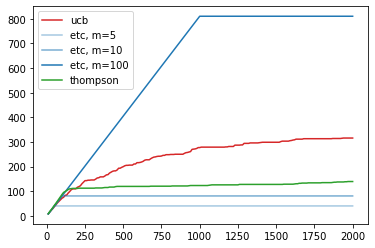

In [177]:
fig, ax = plt.subplots()
t, r_ucb = np.array(ucb.regret_log).T
_, r_etc1 = np.array(etc1.regret_log).T
_, r_etc2 = np.array(etc2.regret_log).T
_, r_etc3 = np.array(etc3.regret_log).T
_, r_gt = np.array(gt.regret_log).T

ax.plot(t, r_ucb, c='tab:red', label='ucb')
ax.plot(t, r_etc1, c='tab:blue', label=f'etc, m={etc1.m}', alpha = .4)
ax.plot(t, r_etc2, c='tab:blue', label=f'etc, m={etc2.m}', alpha = .6)
ax.plot(t, r_etc3, c='tab:blue', label=f'etc, m={etc3.m}')
ax.plot(t, r_gt, c='tab:green', label=f'thompson')
ax.set_xlabel('timestep')
ax.set_ylabel('regret')
plt.legend()

In [162]:
gt = GaussianThompson(T, arms, 0, 1)
gt.run()

/Users/ek/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:58: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


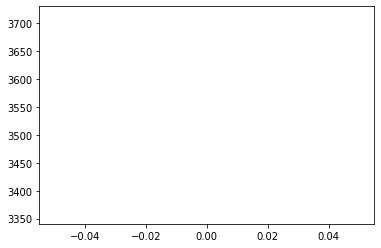

In [163]:
plt.plot(gt.regret)

In [160]:
arms[0].var()

1.0